In [159]:
import requests
from bs4 import BeautifulSoup
import csv
 
URL1 = "https://www.imdb.com/list/ls023696987/"
URL2 = "https://www.imdb.com/list/ls023696987/?sort=list_order,asc&st_dt=&mode=detail&page=2"
r = requests.get(URL1)
r1= requests.get(URL2) 
soup = BeautifulSoup(r.content, 'html5lib')
soup1 = BeautifulSoup(r1.content, 'html5lib')

In [133]:
print(soup)

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head>
         
        <meta charset="utf-8"/>
        <meta content="IE=edge" http-equiv="X-UA-Compatible"/>

    <meta content="app-id=342792525, app-argument=imdb:///list/ls023696987?src=mdot" name="apple-itunes-app"/>



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>300 Best Bollywood Movies of all time - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("

In [134]:
movies=[]
movies1=[]
movie=soup.find('div', attrs={'class':'lister-list'})

In [135]:
for name in movie.findAll('div',attrs={'class':'lister-item mode-detail'}):
    dictionary={}
    dictionary['title']=name.h3.a.text
    #movies.append(name.h3.a.text)
    l=name.find('span', attrs={'class':'ipl-rating-star__rating'})
    #print(l.text)
    dictionary['rating']=l.text
    v=name.find('span',attrs={'name':'nv'})
    dictionary['votes']=v["data-value"]    
    movies.append(dictionary)

In [136]:
movies

[{'rating': '8.4', 'title': '3 Idiots', 'votes': '273245'},
 {'rating': '8.2', 'title': 'Sholay', 'votes': '43458'},
 {'rating': '8.2', 'title': 'Dilwale Dulhania Le Jayenge', 'votes': '53779'},
 {'rating': '8.1', 'title': 'Mother India', 'votes': '6977'},
 {'rating': '8.1',
  'title': 'Lagaan: Once Upon a Time in India',
  'votes': '86873'},
 {'rating': '8.3', 'title': 'Rang De Basanti', 'votes': '93087'},
 {'rating': '8.2', 'title': 'Gangs of Wasseypur', 'votes': '61807'},
 {'rating': '8.4', 'title': 'Mughal-E-Azam', 'votes': '5189'},
 {'rating': '8.4', 'title': 'Do Bigha Zamin', 'votes': '1402'},
 {'rating': '8.8', 'title': 'Anand', 'votes': '19590'},
 {'rating': '8.4', 'title': 'Taare Zameen Par', 'votes': '124506'},
 {'rating': '8.5', 'title': 'Pyaasa', 'votes': '4234'},
 {'rating': '8.5', 'title': 'Dangal', 'votes': '96396'},
 {'rating': '8.1', 'title': 'Deewaar', 'votes': '8192'},
 {'rating': '8.3', 'title': 'Swades: We, the People', 'votes': '69444'},
 {'rating': '8.5', 'title'

In [137]:
movie1=soup1.find('div', attrs={'class':'lister-list'})
for name1 in movie1.findAll('div',attrs={'class':'lister-item mode-detail'}):
    dictionary={}
    dictionary['title']=name1.h3.a.text
    #movies.append(name.h3.a.text)
    l=name1.find('span', attrs={'class':'ipl-rating-star__rating'})
    #print(l.text)
    dictionary['rating']=l.text
    v=name1.find('span',attrs={'name':'nv'})
    dictionary['votes']=v["data-value"]   
    movies1.append(dictionary)

In [138]:
movies1

[{'rating': '7.8', 'title': 'Dabba', 'votes': '39375'},
 {'rating': '7.7', 'title': 'Kuch Kuch Hota Hai', 'votes': '39979'},
 {'rating': '8', 'title': 'Company', 'votes': '12101'},
 {'rating': '7.9', 'title': 'Parinda', 'votes': '2580'},
 {'rating': '7.4', 'title': 'Ram Aur Shyam', 'votes': '708'},
 {'rating': '8.2', 'title': 'Ankur', 'votes': '702'},
 {'rating': '7.7', 'title': 'Ghayal', 'votes': '3210'},
 {'rating': '7.6', 'title': 'Bandit Queen', 'votes': '3748'},
 {'rating': '7.4', 'title': 'Pakeezah', 'votes': '1222'},
 {'rating': '7.8', 'title': 'Guru', 'votes': '18423'},
 {'rating': '8.1', 'title': 'Dev.D', 'votes': '24334'},
 {'rating': '7.7', 'title': 'Zanjeer', 'votes': '3112'},
 {'rating': '7.6', 'title': 'Devdas', 'votes': '31745'},
 {'rating': '8.2', 'title': 'Iqbal', 'votes': '13210'},
 {'rating': '7.8', 'title': 'Baazigar', 'votes': '21452'},
 {'rating': '7.9', 'title': 'Damini', 'votes': '2352'},
 {'rating': '7.7', 'title': 'Dear Zindagi', 'votes': '28309'},
 {'rating':

In [139]:
moviesfinal=movies+movies1

In [140]:
print(len(moviesfinal))

200


In [141]:
keys=moviesfinal[0].keys()
with open('output.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(moviesfinal)

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv("output.csv")

In [146]:
df.head()

,title,rating,votes
0,3 Idiots,8.4,273245
1,Sholay,8.2,43458
2,Dilwale Dulhania Le Jayenge,8.2,53779
3,Mother India,8.1,6977
4,Lagaan: Once Upon a Time in India,8.1,86873


In [147]:
df.dtypes

title      object
rating    float64
votes       int64
dtype: object

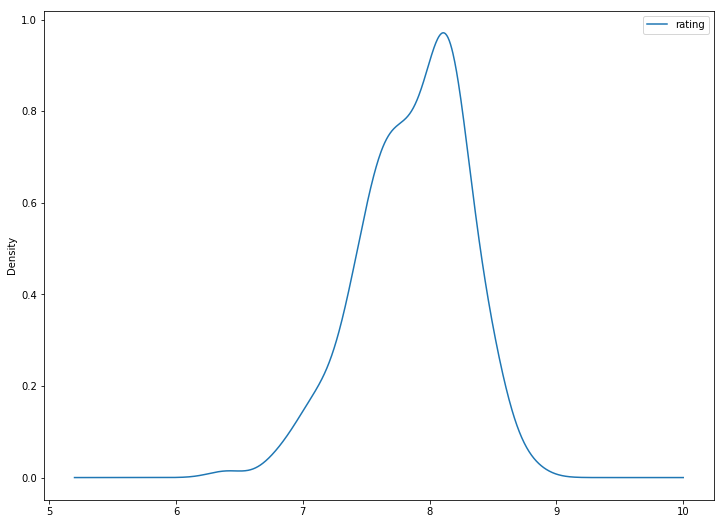

In [162]:
df.plot(kind='density',x='votes',figsize=(12,9))

In [158]:
df.describe()

,rating,votes
count,200.000000,200.000000
mean,7.872500,19027.030000
std,0.410287,28757.417241
min,6.400000,237.000000
25%,7.600000,2174.000000
50%,7.900000,9591.500000
75%,8.200000,23407.000000
max,8.800000,273245.000000


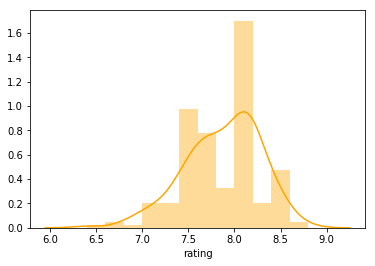

In [198]:
#plt.figure()
sns.distplot(df.rating,color='orange')


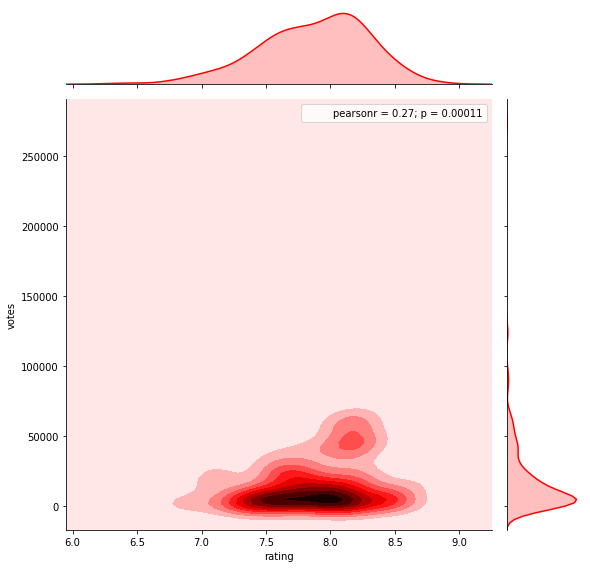

In [196]:
sns.jointplot(x="rating",y="votes", data=df,kind='kde',color='red',size=8)